<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%ED%91%9C%EB%B3%B8%EB%B6%84%ED%8F%AC%EC%99%80_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##값을 이용한 확률추정

누적 확률함수를 이용한 확률추정

In [2]:
from scipy import stats

st_norm = stats.norm(75, 5)
prob = st_norm.cdf(80) - st_norm.cdf(70)
print('정규분포 확률: ', prob)

정규분포 확률:  0.6826894921370859


In [3]:
st_norm = stats.norm(0, 1)

z1 = (70 - 75) / 5
z2 = (80 - 75) / 5

print('z1 누적확률: ', st_norm.cdf(z1))
print('z2 누적확률: ', st_norm.cdf(z2))

prob2 = st_norm.cdf(z2) - st_norm.cdf(z1)
print('prob2: ', prob2)

z1 누적확률:  0.15865525393145707
z2 누적확률:  0.8413447460685429
prob2:  0.6826894921370859


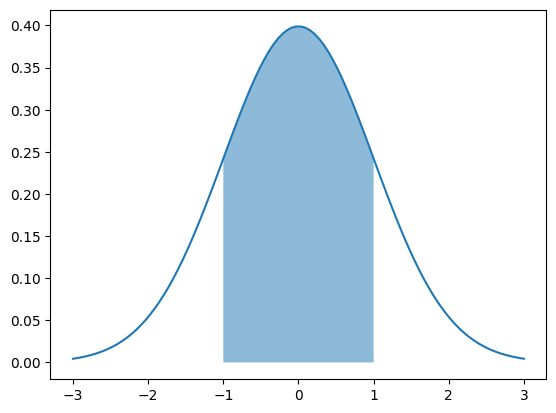

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
plt.plot(x, st_norm.pdf(x))

interval = x[np.logical_and(x >= z1, x <= z2)]
plt.fill_between(interval, y1 = 0, y2 = st_norm.pdf(interval), alpha = 0.5)
plt.show()

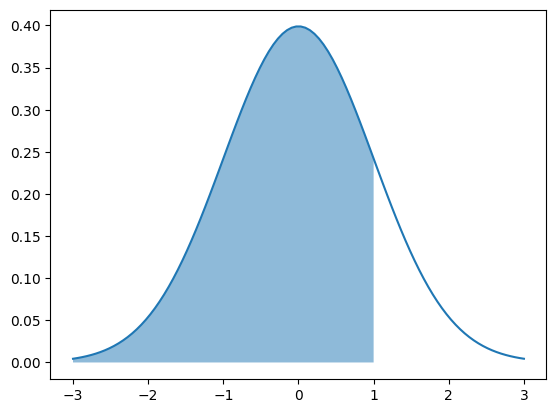

In [5]:
x = np.linspace(-3, 3, 100)
plt.plot(x, st_norm.pdf(x))

interval = x[x <= 1]
plt.fill_between(interval, y1 = 0, y2 = st_norm.pdf(interval), alpha = 0.5)
plt.show()

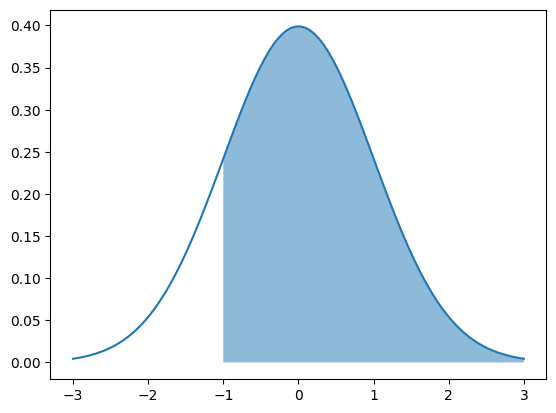

In [6]:
x = np.linspace(-3, 3, 100)
plt.plot(x, st_norm.pdf(x))

interval = x[x >= -1]
plt.fill_between(interval, y1 = 0, y2 = st_norm.pdf(interval), alpha = 0.5)
plt.show()

##z 검정

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mu = 30
sigma = 5
norm_obj = stats.norm(loc = mu, scale = sigma)
n = 50
x = norm_obj.rvs(n)
print(x)

[31.06301315 30.24955435 24.11667492 27.37399613 34.25736184 18.74326857
 23.73765615 37.60057381 26.67664164 23.75835391 25.00347751 27.19159223
 31.68594748 30.9315172  26.65182462 28.99709645 35.20458908 34.25254693
 19.04149372 29.94853688 29.41694387 33.01526117 27.77072572 29.3904482
 31.04738713 33.73880706 31.53564666 29.62996288 32.29630577 25.19362747
 31.39621535 24.72750581 24.17881687 30.29035798 31.15987068 32.26449502
 27.34412324 32.83300485 27.51566251 30.49385018 28.79705183 23.43710334
 31.3110192  30.34669956 38.64040384 34.81573483 29.84126621 29.34958886
 30.60416953 29.17657087]


In [8]:
xbar = x.mean()
z = (xbar - mu) / (sigma / np.sqrt(len(x)))
print('z: ', z)
print('검정통계량 값은 %.5f 입니다.' %z)

z:  -0.9038424682722933
검정통계량 값은 -0.90384 입니다.


In [9]:
alpha = 0.05

interval = stats.norm().interval(1 - alpha)
print('채택역: ', interval)

채택역:  (-1.959963984540054, 1.959963984540054)


In [10]:
if interval[0] < z < interval[1]:
  print('귀무가설 채택')
else:
  print('귀무가설 기각')

귀무가설 채택


##t 검정

In [11]:
from scipy import stats
import numpy as np

sample_data = np.random.uniform(172, 179, size = 29)
print(sample_data)
print(len(sample_data),'명', sep = ' ')

[176.84481329 177.36014147 174.12887175 172.81665919 178.31784931
 178.84223754 178.44705401 177.63611187 172.75431653 175.60071725
 172.34775418 172.11763607 177.44428349 174.25789562 175.2996622
 174.4424382  172.42409766 172.33449663 174.68330376 175.11748115
 174.81043006 172.37368316 175.50531955 175.88932512 178.13726486
 172.24826046 174.6177394  177.93749356 175.88096798]
29 명


### 정규성 검정

In [12]:
statistic, pvalue = stats.shapiro(sample_data)
print('statistic = ', statistic)
print('pvalue = ', pvalue)

statistic =  0.9243810176849365
pvalue =  0.03942416235804558


### 1 - way t test

In [13]:
statistic, pvalue = stats.ttest_1samp(sample_data, 175.5)
print('t 검정통계량: %.5f, pvalue: %.5f' %(statistic, pvalue))

alpha = 0.05
if pvalue >= alpha:
  print('귀무가설 채택')
else:
  print('귀무가설 기각')

t 검정통계량: -0.75256, pvalue: 0.45800
귀무가설 채택


In [14]:
print(sample_data.mean())

175.19373466619956


### 비모수 검정

In [15]:
from scipy.stats import wilcoxon

statistic, value = wilcoxon(sample_data - 175.5)
print('t 검정통계량: %.5f, pvalue: %.5f' %(statistic, pvalue))

t 검정통계량: 176.00000, pvalue: 0.45800


###독립표본 t 검정

In [16]:
from scipy import stats
import numpy as np

method1_score = np.random.uniform(50, 100, size = 30)
method2_score = np.random.uniform(45, 95, size = 30)

print(method1_score)
print(method2_score)

[54.11810098 79.41001537 96.34464241 73.66764121 60.35302822 75.96610599
 86.32326235 97.01747343 69.24932766 72.34114941 76.38220787 57.96370351
 73.05480002 53.16792783 72.8225288  71.76388667 52.96487197 55.5685332
 58.53633549 79.22719194 73.39057653 62.38321643 92.79423947 53.05903521
 77.25075356 80.49351473 57.03949553 91.80641635 86.7614601  54.11525144]
[76.59911154 54.98326926 64.60542134 85.92652799 56.87037013 77.47197342
 68.6683346  66.98610888 84.94806259 88.71045712 52.55183697 87.85578964
 70.30397527 94.19702645 69.61256971 72.75316602 76.44734333 87.40263374
 74.41852985 81.55145989 66.50796262 74.18718938 94.97771374 66.54355887
 63.41883515 78.79407071 94.40738737 71.63183619 90.25835301 48.10453225]


**동질성 검정**

In [17]:
statistic, pvalue = stats.levene(method1_score, method2_score)
print('동질성 검정통계량: %.5f, pvalue: %.5f' %(statistic, pvalue))

동질성 검정통계량: 0.22447, pvalue: 0.63743


**두 집단 평균 차이 검정**

In [18]:
statistic, pvalue = stats.ttest_ind(method1_score, method2_score)
print('t 검정통계량: %.3f, pvalue: %.3f' %(statistic, pvalue))

alpha = 0.05
if pvalue >= alpha:
  print('귀무가설 채택')
else:
  print('귀무가설 기각')

t 검정통계량: -0.937, pvalue: 0.352
귀무가설 채택
